In [64]:
import os
import pandas as pd
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt 


In [4]:
os.chdir(r'C:\Users\786552\Ydealogy\datasets')
trainFile = pd.read_csv('Boston.csv')
trainFile.head(5)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


           CRIM        ZN     INDUS
CRIM   1.000000 -0.200469  0.406583
ZN    -0.200469  1.000000 -0.533828
INDUS  0.406583 -0.533828  1.000000


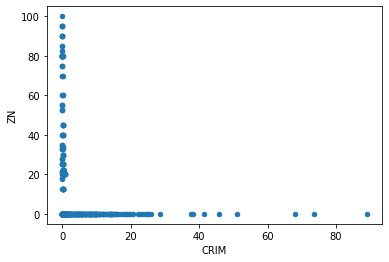

In [70]:
# Find correlation


findCorr = trainFile.loc[:,['CRIM', 'ZN', 'INDUS']]
print(findCorr.corr())
%matplotlib inline
findCorr.plot.scatter(x='CRIM',y='ZN')



In [6]:
from sklearn.linear_model import LinearRegression 
from sklearn.feature_selection import RFE
x= trainFile.loc[:,['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT']]
y= trainFile.loc[:,'Price']
linearModel = LinearRegression()
RfeModel = RFE(linearModel,1)
RfeModel.fit(x,y)

Ranking = pd.DataFrame(RfeModel.ranking_).T
Ranking.columns = x.columns
Ranking

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,8,10,9,3,1,2,13,5,7,11,4,12,6


In [42]:
from sklearn.metrics import r2_score
def calc_r2_adj(x,y,predicted):
    r2 = r2_score(y,predicted)
    n = len(y)
    p = x.shape[1]
    adjr2 = 1-(1-r2) * (n-1) / (n-p-1)
    return(r2,adjr2)

In [83]:
linearModel = LinearRegression()
x = trainFile.loc[:,['NOX','RM','CHAS','PTRATIO','DIS','LSTAT']]
y = trainFile.loc[:,'Price']
linearModel.fit(x,y)


PredctionPrice = linearModel.predict(x) #Test data

priceList = pd.DataFrame()
priceList['OriginalPrice'] =y
priceList['PredictedPrice'] =PredctionPrice
priceList['Residual'] =y -PredctionPrice
print(linearModel.intercept_ , linearModel.coef_)


print(calc_r2_adj(x,y,PredctionPrice))
#priceList.to_csv('PricePredictedinBoston.csv')


36.92263403805332 [-18.74043265   4.11181168   3.24430477  -1.00274627  -1.14458566
  -0.56984422]
(0.7157742117396082, 0.712356667191387)


In [ ]:
y = a + b1x1 + b2x2... bnxn
y = 36.922 + (-18.74043265*NOX)+(4.11181168 * RM)+(3.24430477*CHAS) + (-1.00274627*PTRATIO) +(-1.14458566 *DIS)+(-0.56984422*LSTAT)

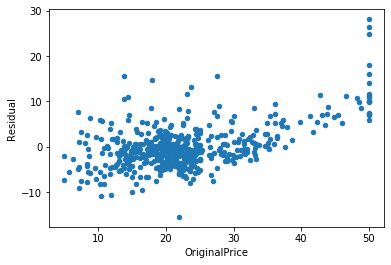

In [84]:
priceList = priceList.sort_values(by='OriginalPrice') # Sorting
%matplotlib inline
priceList.plot.scatter(x='OriginalPrice',y='Residual')